In [3]:
import pandas as pd
df = pd.read_csv('flights_2025.csv')

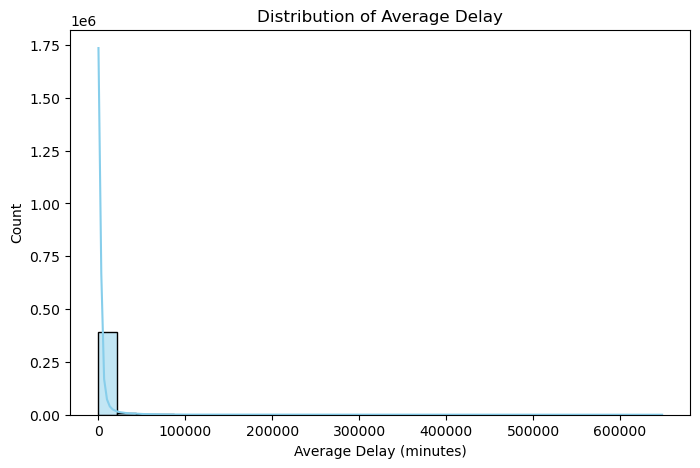

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of avg_delay
plt.figure(figsize=(8,5))
sns.histplot(df['avg_delay'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Delay")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Count")
plt.show()

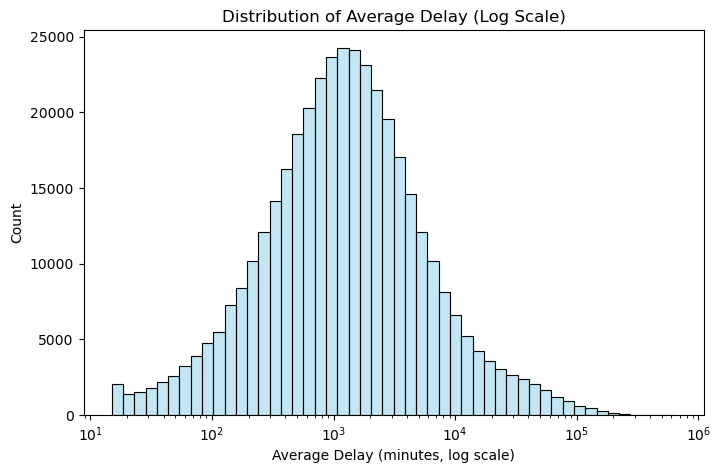

In [ ]:


plt.figure(figsize=(8,5))
sns.histplot(df['avg_delay'], bins=50, kde=True, color="skyblue", log_scale=True)
plt.title("Distribution of Average Delay (Log Scale)")
plt.xlabel("Average Delay (minutes, log scale)")
plt.ylabel("Count")
plt.show()



The distribution of average delays is highly right-skewed with extreme outliers inflating the scale. After applying a log transformation, the data reveals a more normal-like pattern, showing that most flights face moderate delays while a few experience very large disruptions.

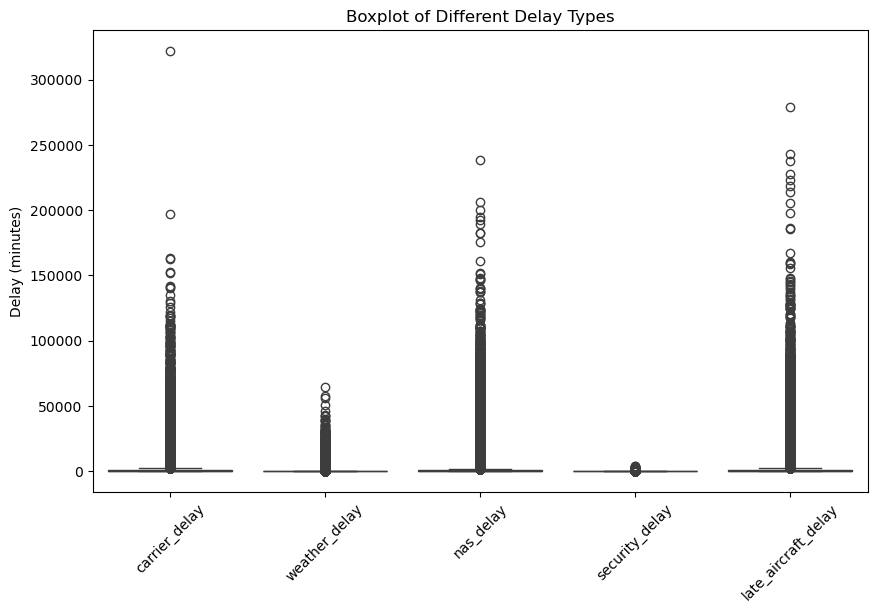

In [6]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[delay_types])
plt.title("Boxplot of Different Delay Types")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


1. Boxplot of Different Delay Types (Normal Scale)

Delays are highly skewed with many extreme outliers, especially in carrier, NAS, and late aircraft delays. Security delays are comparatively minimal.

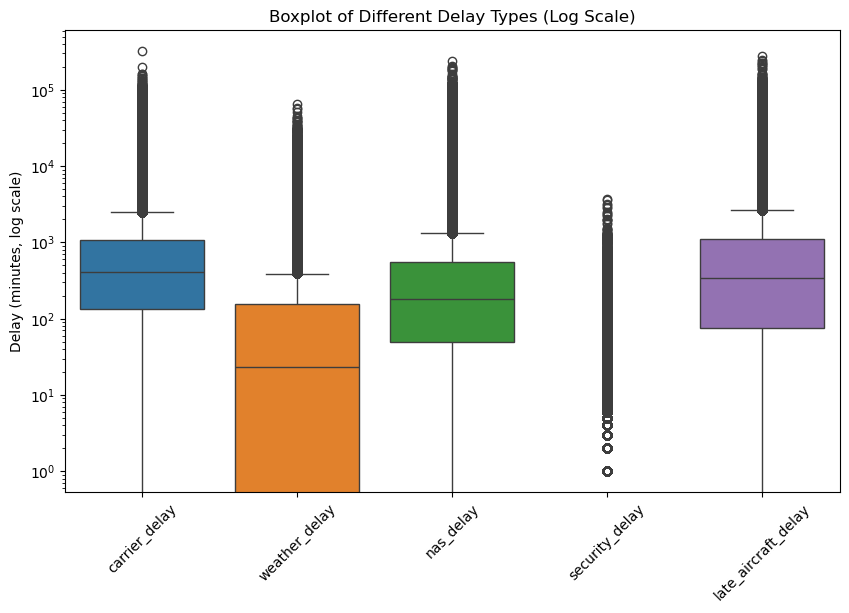

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[delay_types])
plt.yscale("log")
plt.title("Boxplot of Different Delay Types (Log Scale)")
plt.ylabel("Delay (minutes, log scale)")
plt.xticks(rotation=45)
plt.show()


2. Boxplot of Different Delay Types (Log Scale)

On a log scale, late aircraft and carrier delays show higher median and wider spread, while weather and security delays remain relatively lower. This highlights late aircraft as a major contributor to variability.

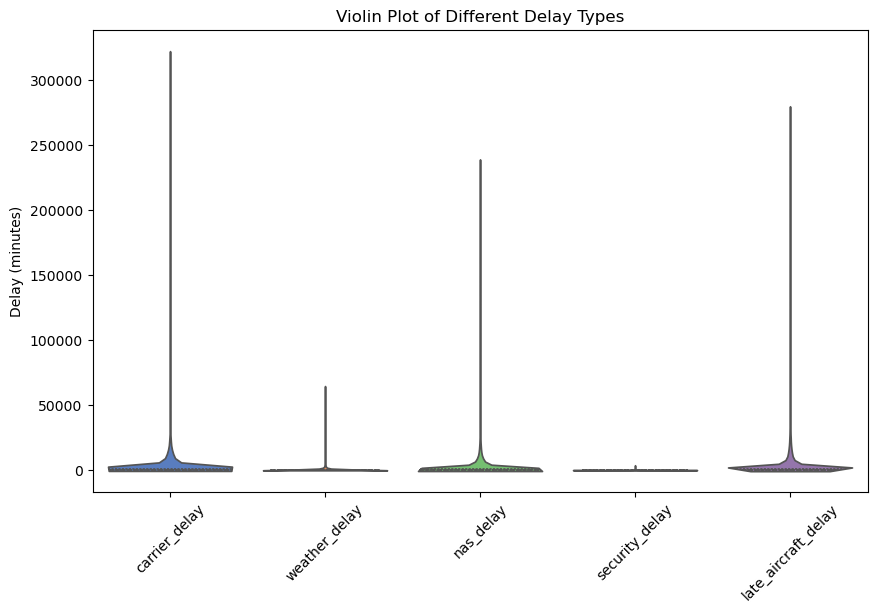

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[delay_types], inner="quartile", palette="muted")
plt.title("Violin Plot of Different Delay Types")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


3. Violin Plot of Different Delay Types

Carrier and late aircraft delays dominate with broader distributions, whereas weather and security delays are concentrated at lower values. This confirms operational and aircraft issues as primary drivers of delay.

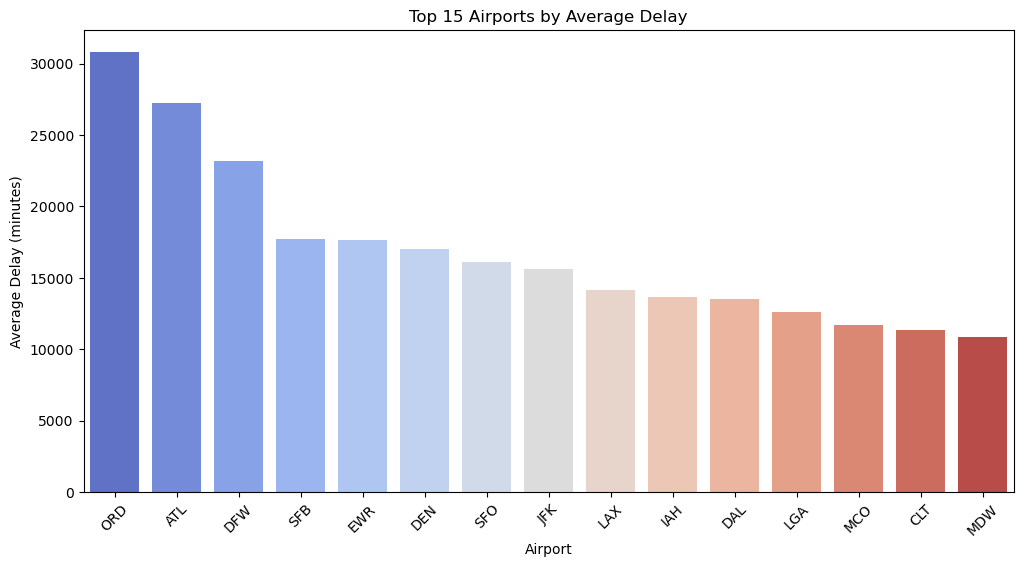

In [ ]:
plt.figure(figsize=(12,6))
top_airports = df.groupby('airport')['avg_delay'].mean().sort_values(ascending=False).head(15)

sns.barplot(
    x=top_airports.index, 
    y=top_airports.values, 
    hue=top_airports.index,     
    palette="coolwarm", 
    legend=False                 
)

plt.title("Top 15 Airports by Average Delay")
plt.xlabel("Airport")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()



This chart shows that ORD (Chicago O’Hare) and ATL (Atlanta) have the highest average delays among the top 15 airports, while MDW (Chicago Midway) and CLT (Charlotte) experience the lowest delays in this group.

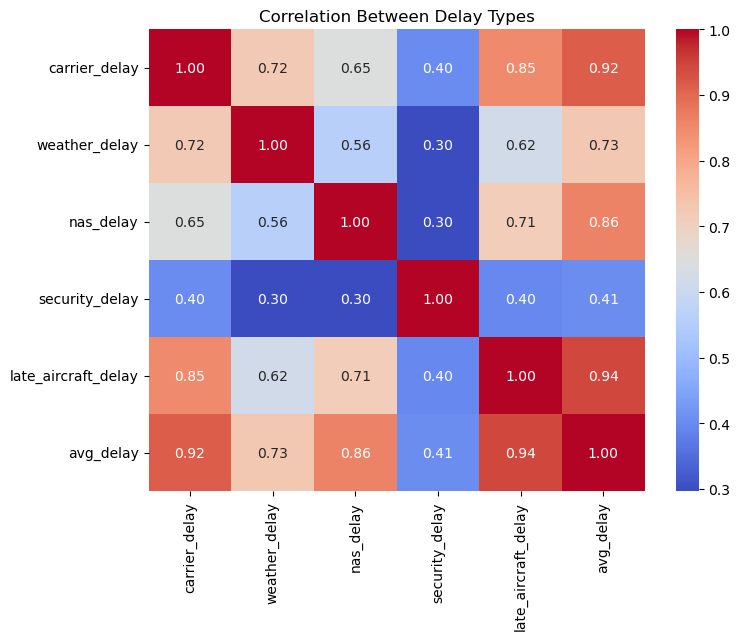

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[delay_types + ['avg_delay']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Delay Types")
plt.show()


The heatmap shows that late aircraft delays and carrier delays are most strongly correlated with overall average delays, while security delays have the weakest correlation with other delay types.

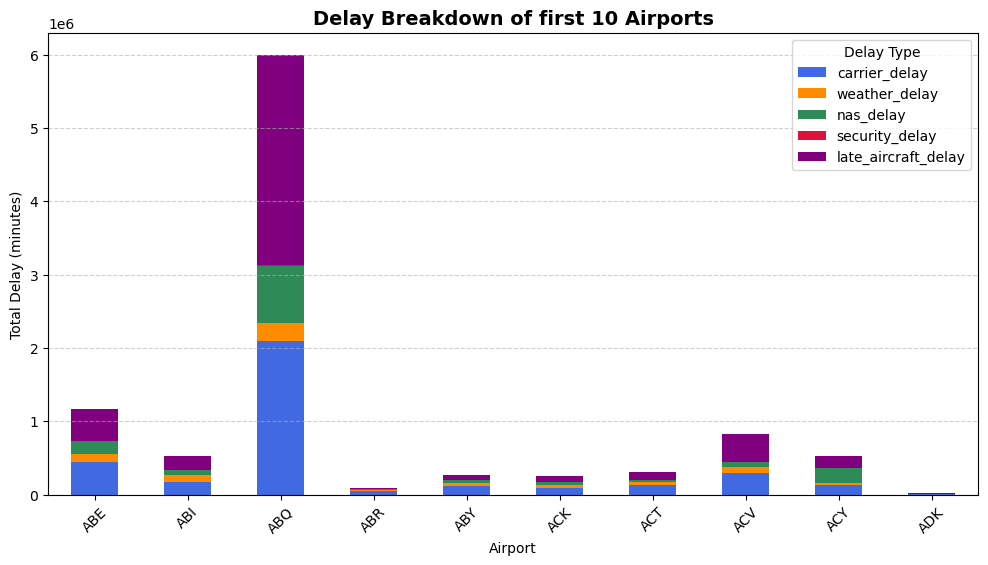

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define delay types
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Define unique colors for each delay type
colors = {
    'carrier_delay': 'royalblue',
    'weather_delay': 'darkorange',
    'nas_delay': 'seagreen',
    'security_delay': 'crimson',
    'late_aircraft_delay': 'purple'
}

# --- Stacked Bar Plot ---
airport_group = df.groupby('airport')[delay_types].sum().head(10)

airport_group.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[colors[col] for col in delay_types]
)

plt.title("Delay Breakdown of first 10 Airports", fontsize=14, fontweight="bold")
plt.ylabel("Total Delay (minutes)")
plt.xlabel("Airport")
plt.xticks(rotation=45)
plt.legend(title="Delay Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Graph 2: Delay Breakdown of First 10 Airports (Alphabetical Order)

Most of these smaller/regional airports show relatively low total delays, except ABQ (Albuquerque) which stands out with a much higher delay volume.

Again, carrier delays (blue) and late aircraft delays (purple) dominate for ABQ, while others remain at smaller scales.

Airports like ABR, ACT, ADK have negligible total delays compared to ABQ.

Insights: In smaller airports, delay volumes are low overall, but certain regional airports (like ABQ) can show disproportionately high delays due to specific operational issues.

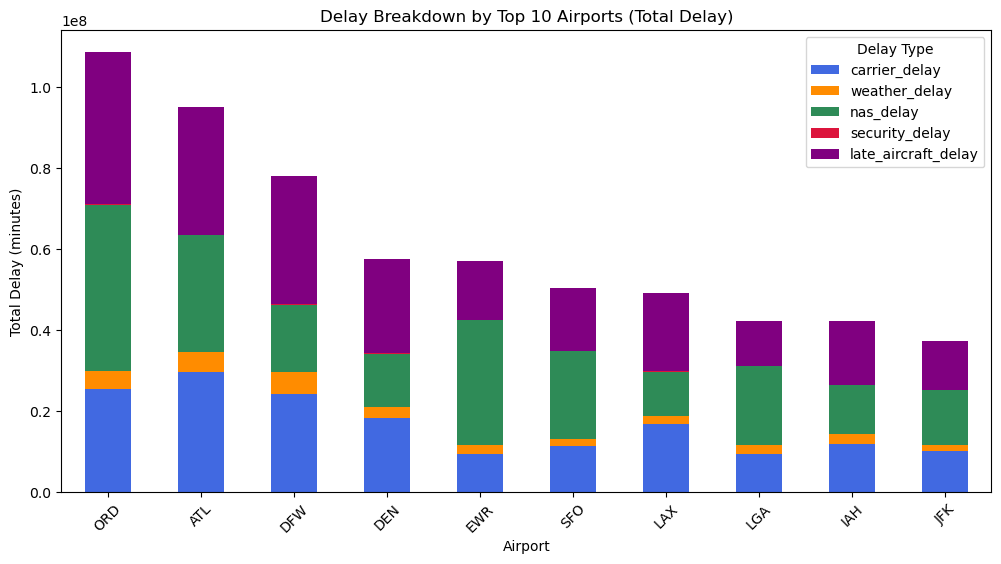

In [26]:
colors = {
    'carrier_delay': 'royalblue',
    'weather_delay': 'darkorange',
    'nas_delay': 'seagreen',
    'security_delay': 'crimson',
    'late_aircraft_delay': 'purple'
}

airport_group = df.groupby('airport')[delay_types].sum()
top_airports = airport_group.sum(axis=1).sort_values(ascending=False).head(10)
airport_group = airport_group.loc[top_airports.index]

airport_group.plot(
    kind='bar', stacked=True, figsize=(12,6),  color=[colors[col] for col in delay_types]
)
plt.title("Delay Breakdown by Top 10 Airports (Total Delay)")
plt.ylabel("Total Delay (minutes)")
plt.xlabel("Airport")
plt.xticks(rotation=45)
plt.legend(title="Delay Type")
plt.show()


Graph 1: Delay Breakdown by Top 10 Airports (Highest Total Delays)

ORD (Chicago O’Hare) and ATL (Atlanta) lead with the highest total delays, exceeding other airports significantly.

Across these top airports, carrier delays (blue), NAS delays (green), and late aircraft delays (purple) are the largest contributors to total delay.

Weather delays (orange) and security delays (red) are relatively minor in comparison.

The distribution pattern is consistent: late aircraft delays + NAS delays dominate at most large airports.

Insights: Operational (NAS) and aircraft connection issues are more critical causes of delays than weather or security at major hubs.

###################
✅ Overall Takeaway:

Major hubs (ORD, ATL, DFW, etc.) face huge systemic delays driven mainly by NAS congestion and late aircraft issues.

Smaller/regional airports generally have minimal delays, but exceptions (like ABQ) indicate localized bottlenecks.

Across all airports, weather and security delays are consistently the smallest contributors.

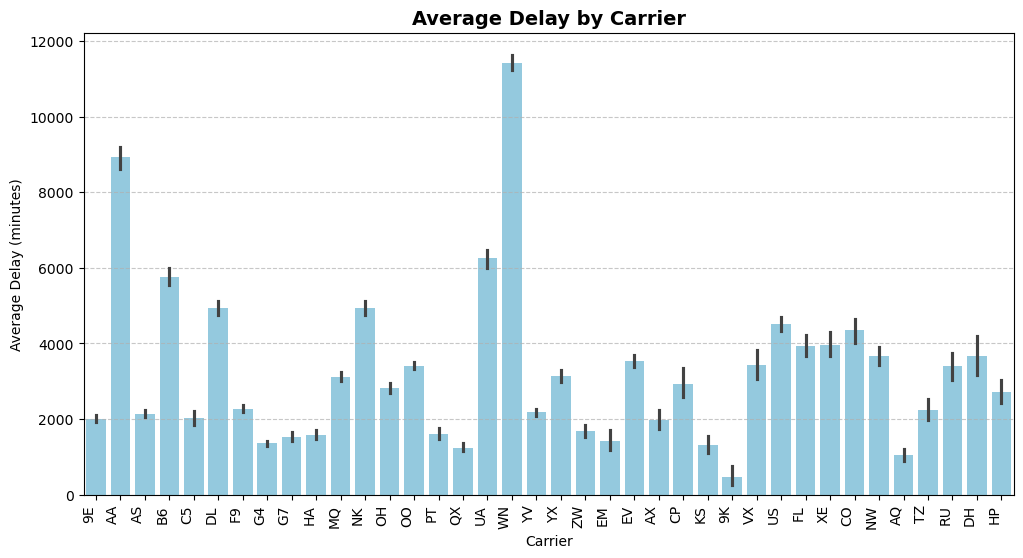

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(
    x="carrier", 
    y="avg_delay", 
    data=df, 
    estimator="mean", 
    color="skyblue"   
)
plt.title("Average Delay by Carrier", fontsize=14, fontweight="bold")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Carrier")
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Average Delay by Carrier (Bar Plot): A few carriers, especially AA and WN, show significantly higher average delays compared to others, indicating performance issues concentrated in specific airlines.

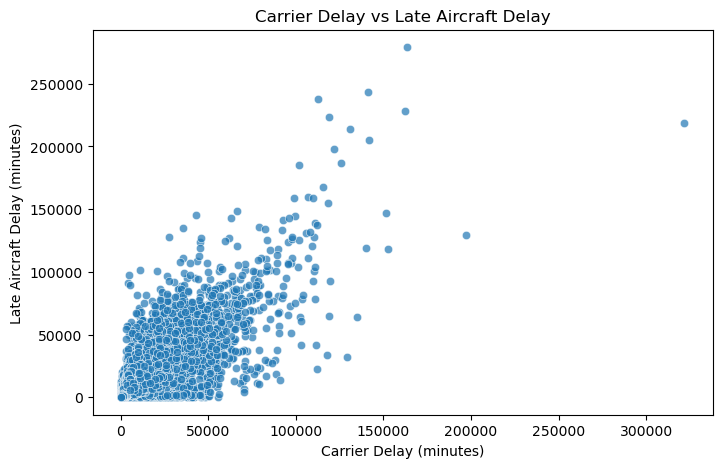

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="carrier_delay", y="late_aircraft_delay", data=df, alpha=0.7)
plt.title("Carrier Delay vs Late Aircraft Delay")
plt.xlabel("Carrier Delay (minutes)")
plt.ylabel("Late Aircraft Delay (minutes)")
plt.show()


Carrier Delay vs Late Aircraft Delay (Scatter Plot): There’s a positive correlation — higher carrier delays are often linked with higher late aircraft delays, suggesting cascading effects of initial delays.


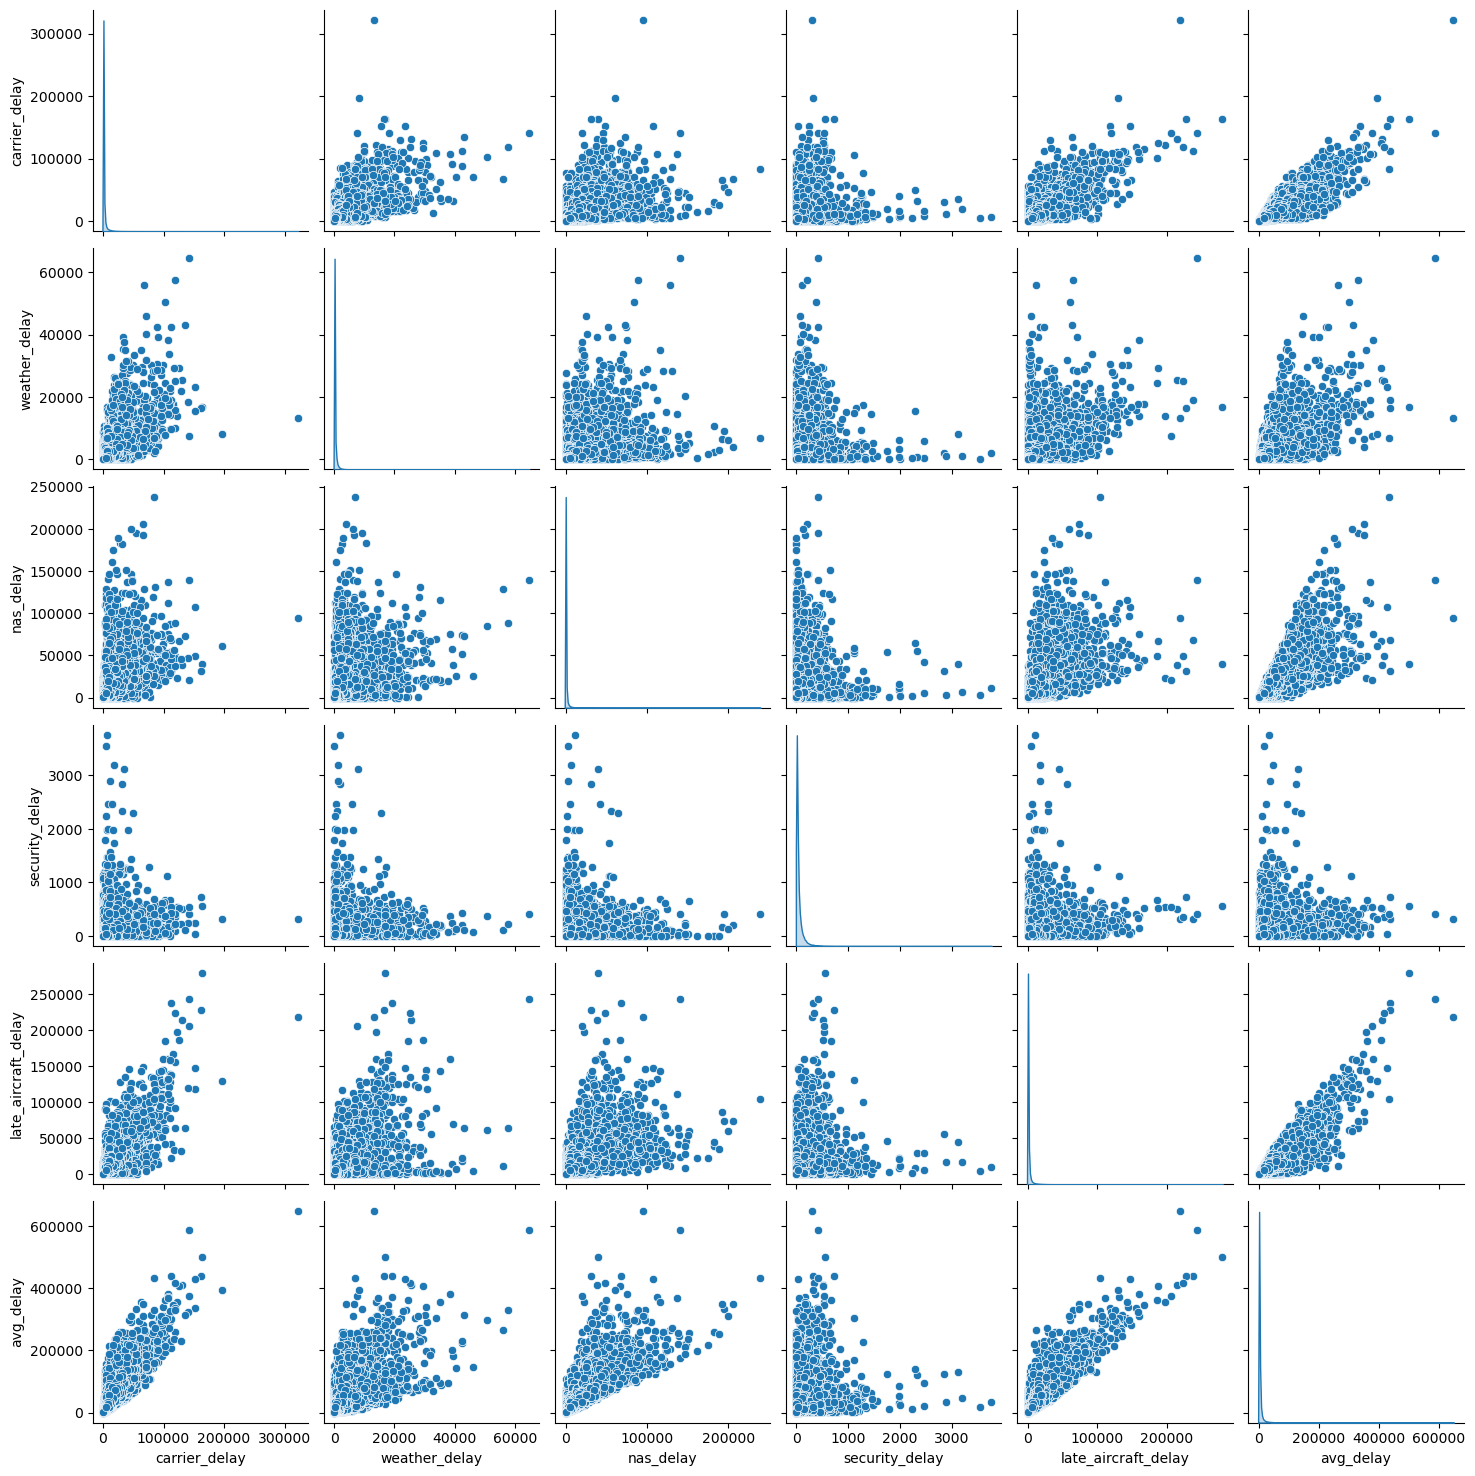

In [12]:
sns.pairplot(df[delay_types + ['avg_delay']], diag_kind="kde")
plt.show()


This pairplot shows that carrier_delay, nas_delay, and late_aircraft_delay are strongly correlated with overall average delay, indicating they are the main contributors. In contrast, weather_delay and security_delay show weaker relationships, meaning they have less overall impact on total delays.